In [78]:
!pip install --upgrade pandas # Upgrade of pandas is necessary to use DataReader
!pip install --upgrade pandas-datareader # Upgrade of pandas-datareader is necessary to use DataReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [79]:
# Insert Stock data
# start = datetime.now() - relativedelta(years=5) # Get date 5 years ago from today
start = datetime.now() - relativedelta(years=10) # Get date 10 years ago from today
end = date.today() # Get today's date

df = data.DataReader('TSLA', 'yahoo', start, end) # Run necessary pip updates inorder for this code to work
df.head() # Show first 5 rows of data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-12,6.896,6.584,6.754,6.688,5169500.0,6.688
2012-04-13,6.808,6.570,6.788,6.718,3248000.0,6.718
2012-04-16,6.740,6.418,6.682,6.450,5498000.0,6.450
2012-04-17,6.614,6.408,6.486,6.448,5577500.0,6.448
2012-04-18,6.550,6.306,6.418,6.532,4115500.0,6.532


In [80]:
df.tail() # Show last 5 rows of data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990
2022-04-11,1008.469971,974.640015,980.400024,975.929993,19785700.0,975.929993
2022-04-12,1021.025024,976.638672,997.640015,986.349976,21063971.0,986.349976


In [81]:
df = df.reset_index() # Replace the date index with a number index starting from 0
df = df.drop(['Date', 'Adj Close'], axis = 1) # Remove Date and Adj Close columns
df.head()

,High,Low,Open,Close,Volume
0,6.896,6.584,6.754,6.688,5169500.0
1,6.808,6.570,6.788,6.718,3248000.0
2,6.740,6.418,6.682,6.450,5498000.0
3,6.614,6.408,6.486,6.448,5577500.0
4,6.550,6.306,6.418,6.532,4115500.0


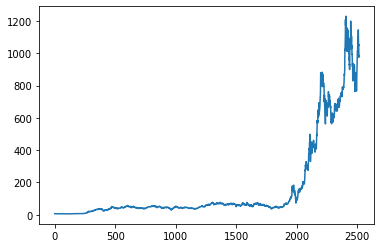

In [82]:
plt.plot(df.Close) # Display stock as plot on a graph

In [83]:
df

,High,Low,Open,Close,Volume
0,6.896000,6.584000,6.754000,6.688000,5169500.0
1,6.808000,6.570000,6.788000,6.718000,3248000.0
2,6.740000,6.418000,6.682000,6.450000,5498000.0
3,6.614000,6.408000,6.486000,6.448000,5577500.0
4,6.550000,6.306000,6.418000,6.532000,4115500.0
...,...,...,...,...,...
2513,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0
2514,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0
2515,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0
2516,1008.469971,974.640015,980.400024,975.929993,19785700.0


In [84]:
# Rolling function for 100 day moving average
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    978.851096
2514    979.089495
2515    979.210495
2516    978.422495
2517    977.395895
Name: Close, Length: 2518, dtype: float64

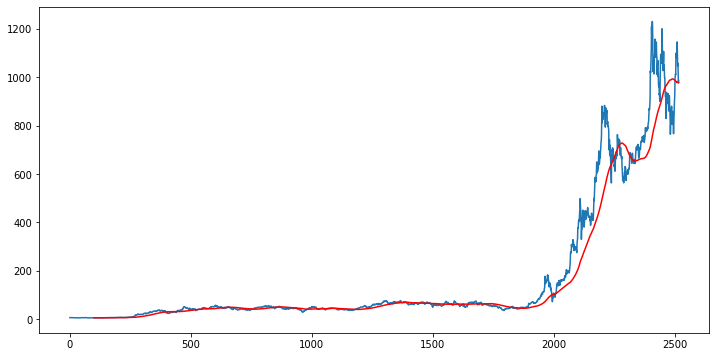

In [85]:
# Plot ma100 on closing graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [86]:
# Rolling function for 200 day moving average
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    879.712046
2514    881.715496
2515    883.443846
2516    884.964146
2517    886.452296
Name: Close, Length: 2518, dtype: float64

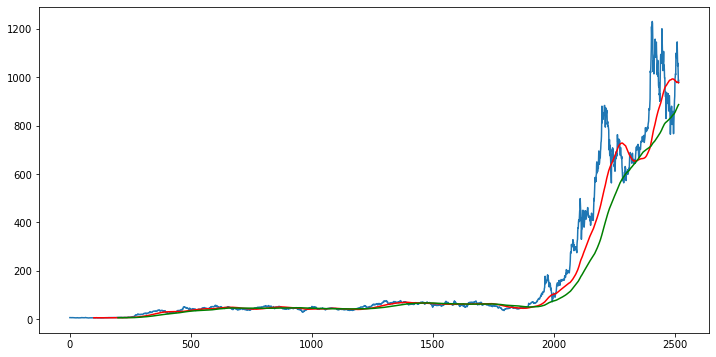

In [87]:
# Plot ma100 on closing graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [88]:
df.shape # Display number of rows and columns

(2518, 5)

In [89]:
# Split data into training and testing

# df['Close] is the column selected
# [0:split_percent] The 0 is the starting row index
# The colon symbol ':' tells the system the ending row
# The formula for the split_percent is to tell the row where to end
split_percent = int(len(df)*0.70) # Setting setting split_percent to 70%
max_percent = int(len(df))
data_training = pd.DataFrame(df['Close'][0:split_percent]) # Set training data to first 70 percent
data_testing = pd.DataFrame(df['Close'][split_percent:max_percent]) # Set testing data to last 30 percent

# Display shape of training data and testing data
# Both should add up to df.shape
print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [90]:
data_training.head()

,Close
0,6.688
1,6.718
2,6.450
3,6.448
4,6.532


In [91]:
data_testing.head()

,Close
1762,53.276001
1763,54.672001
1764,54.245998
1765,54.652000
1766,52.549999


In [92]:
from sklearn.preprocessing import MinMaxScaler

# Converts the data into a range between 0 to 1, it is a way to normalize the input features/variables 
scaler = MinMaxScaler(feature_range=(0,1))

In [93]:
data_training_array = scaler.fit_transform(data_training) # Transform the data into an array within the feature range
data_training_array

array([[0.02045138],
       [0.02086932],
       [0.01713569],
       ...,
       [0.69646144],
       [0.67517412],
       [0.67316803]])

In [94]:
data_training_array.shape

(1762, 1)

In [95]:
len(data_training_array)

1762

In [96]:
# Divide the data into training x_train and y_train
x_train = []
y_train = []

for i in range(100, len(data_training_array)): # 100 Steps
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
x_train.shape

(1662, 100, 1)

In [98]:
# Build the LSTM model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
# x_train.shape[1] is taking the value of index 1 in the x_train.shape which is 100
# The second 1 is just the number of columns were are working with
model.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 32s 494ms/step - loss: 0.0604
Epoch 2/50
52/52 [==============================] - 16s 315ms/step - loss: 0.0138
Epoch 3/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0134
Epoch 4/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0121
Epoch 5/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0107
Epoch 6/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0102
Epoch 7/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0102
Epoch 8/50
52/52 [==============================] - 15s 281ms/step - loss: 0.0102
Epoch 9/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0102
Epoch 10/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0093
Epoch 11/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0085
Epoch 12/50
52/52 [==============================] - 15s 298ms/step - loss: 0.0090
Epoch 13/50
5

In [101]:
model.save('keras_model.h5')

In [102]:
data_testing.head()

,Close
1762,53.276001
1763,54.672001
1764,54.245998
1765,54.652000
1766,52.549999


In [103]:
data_training.tail(100)

,Close
1662,70.862000
1663,70.694000
1664,69.498001
1665,67.638000
1666,65.166000
...,...
1757,54.639999
1758,54.462002
1759,55.212002
1760,53.683998


In [104]:
past_100_days = data_training.tail(100)

In [105]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [106]:
final_df.head()

,Close
0,70.862000
1,70.694000
2,69.498001
3,67.638000
4,65.166000


In [107]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02936733],
       [0.02922664],
       [0.02822506],
       [0.02666743],
       [0.02459728],
       [0.0279755 ],
       [0.02762713],
       [0.02828871],
       [0.02716654],
       [0.02872585],
       [0.03006743],
       [0.03027009],
       [0.03083285],
       [0.02998034],
       [0.0311829 ],
       [0.03145255],
       [0.03142576],
       [0.03313246],
       [0.03127669],
       [0.02838083],
       [0.02647314],
       [0.02579314],
       [0.02284703],
       [0.0235823 ],
       [0.01949894],
       [0.02464082],
       [0.02297264],
       [0.02594388],
       [0.02576466],
       [0.02196604],
       [0.02033136],
       [0.02323392],
       [0.02612644],
       [0.02619176],
       [0.02672437],
       [0.027803  ],
       [0.02818654],
       [0.02603264],
       [0.02771255],
       [0.02798388],
       [0.02819491],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.019

In [108]:
input_data.shape

(856, 1)

In [109]:
# Create the data sets x_test and y_test
x_test = []
y_test = []

for i in range(100, len(input_data)):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [110]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [111]:
# Make prediction

y_predicted = model.predict(x_test)

In [112]:
y_predicted.shape

(756, 1)

In [113]:
y_test

array([0.01464012, 0.01580919, 0.01545243, 0.01579244, 0.01403214,
       0.01422475, 0.01334711, 0.01149972, 0.0094078 , 0.01046799,
       0.01000238, 0.00921853, 0.01090849, 0.01273913, 0.01279105,
       0.01140425, 0.01103243, 0.01055341, 0.01014139, 0.00804612,
       0.00893381, 0.00887351, 0.0082672 , 0.00536966, 0.00442001,
       0.00437311, 0.00230464, 0.0027669 , 0.00195291, 0.00162966,
       0.00182394, 0.00154927, 0.00103675, 0.        , 0.00245035,
       0.00295114, 0.00451882, 0.00427597, 0.00567952, 0.00638631,
       0.00507321, 0.00585203, 0.00602119, 0.00771449, 0.00766592,
       0.00794898, 0.00680838, 0.00718356, 0.00748169, 0.00683183,
       0.00674976, 0.0073477 , 0.00745154, 0.00807292, 0.0076341 ,
       0.0093676 , 0.00906612, 0.00860386, 0.00855696, 0.0100409 ,
       0.00998731, 0.01107263, 0.01248288, 0.01229529, 0.01271066,
       0.01248957, 0.01326672, 0.012848  , 0.01360002, 0.01438889,
       0.00834927, 0.00821863, 0.00951331, 0.01060031, 0.01049

In [114]:
y_predicted

array([[0.03763732],
       [0.0377095 ],
       [0.03776357],
       [0.03779802],
       [0.03781268],
       [0.03780949],
       [0.037788  ],
       [0.03774914],
       [0.03769264],
       [0.03761566],
       [0.03751245],
       [0.03738162],
       [0.03722355],
       [0.03703949],
       [0.036836  ],
       [0.03662488],
       [0.03641838],
       [0.03622517],
       [0.03605142],
       [0.03590068],
       [0.03577456],
       [0.03566855],
       [0.03557959],
       [0.03550434],
       [0.03543976],
       [0.03537771],
       [0.03530955],
       [0.03522921],
       [0.03512925],
       [0.03500673],
       [0.03486058],
       [0.03469229],
       [0.03450629],
       [0.03430864],
       [0.03410617],
       [0.03390172],
       [0.03370309],
       [0.03351665],
       [0.03335187],
       [0.03321469],
       [0.03311223],
       [0.03305236],
       [0.03303692],
       [0.03306708],
       [0.03314033],
       [0.03325608],
       [0.03341094],
       [0.033

In [115]:
scaler.scale_

array([0.00083744])

In [116]:
scale_factor = 1/0.00093567
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

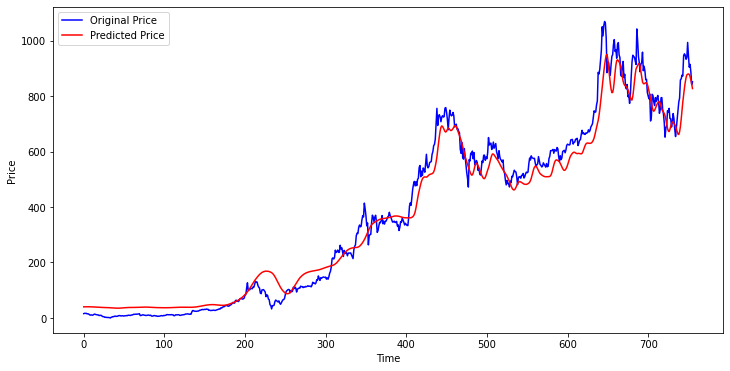

In [117]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()